# 타이타닉 데이터 분석
+ RMS 타이타닉은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선으로, 1912년 4월 10일 첫 출항하였다. 영국의 사우샘프턴을 떠나 미국의 뉴욕으로  향하던 중에 4월 15일 빙산과 충돌하여 침몰하였으며, 이로 인해 1,514명이 사망한 것으로 알려져 있다.
+ 타이타닉 데이터를 분석하여 생존에 영향을 준 요인을 파악하고, 이를 바탕으로 생존 여부를 예측하는 모델을 학습해보자.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#데이터 불러오기
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
#데이터 전처리:결측값 확인
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 중복 데이터 선택

In [5]:
data=df.copy()
data=data.drop(columns=['alive','class','who','sex','embark_town'])
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,deck,alone
0,0,3,22.0,1,0,7.2500,S,True,NaN,False
1,1,1,38.0,1,0,71.2833,C,False,C,False
2,1,3,26.0,0,0,7.9250,S,False,NaN,True
3,1,1,35.0,1,0,53.1000,S,False,C,False
4,0,3,35.0,0,0,8.0500,S,True,NaN,True


## 결측값 처리

In [6]:
# deck:갚판 데이터는 결측값이 너무 많아 의미 없다 판단함
data=data.drop(columns='deck')
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#S(	Southampton)에서 사람이 제일 많았다
cnd=data['embarked'].value_counts()
pd.DataFrame(cnd)

,count
embarked,
S,644
C,168
Q,77


In [8]:
#결측값인 탑승항구는 제일 사람이 많았던 Southampton으로 처리하고, age는 중앙값과 평균값의 사이인 29살로 처리함
data['age']=data['age'].fillna(29)
data['embarked']=data['embarked'].fillna('S')
data.isna().sum()

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

In [9]:
#데이터를 자료형에서 숫자형으로 바꾼다
dict_em={'S':0,'C':1,'Q':2}
dict_ma={False:0,True:1}
dict_al={False:0,True:1}
data['embarked'] = data['embarked'].map(dict_em)
data['adult_male'] = data['adult_male'].map(dict_ma)
data['alone'] = data['alone'].map(dict_al)
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,22.0,1,0,7.2500,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,1


## 학습/평가 데이터 분할
+ 학습 데이터와 평가 데이터를 7:3 비율로 분할

In [10]:
X=data.drop(columns='survived')   # feature
y=data['survived']# target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      623 non-null    int64  
 1   age         623 non-null    float64
 2   sibsp       623 non-null    int64  
 3   parch       623 non-null    int64  
 4   fare        623 non-null    float64
 5   embarked    623 non-null    int64  
 6   adult_male  623 non-null    int64  
 7   alone       623 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.8 KB


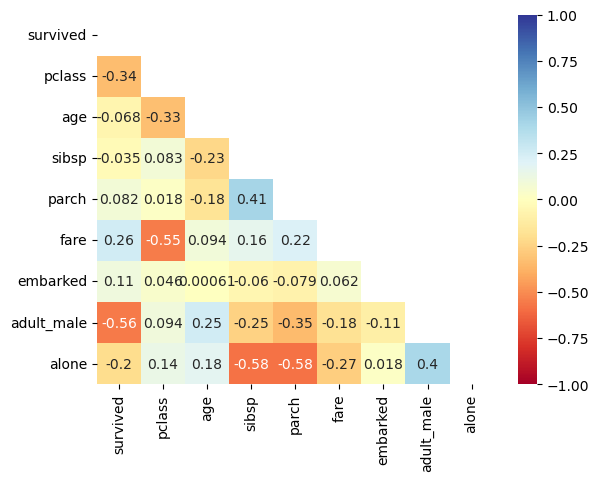

In [12]:
corr_df=data.corr()
df_up=np.triu(corr_df)
sns.heatmap(corr_df,mask=df_up, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.show()

+ 히트맵으로 보아 생존률은 pclass(객실 등급)가 높을 수록, fare(요금)가 높을 수록, 혼자 탄 사람일 때,남성이 아닐 때 높은 것을 보인다.

+ emabarked(탑승 항구)는 상관관계가 있는 것으로 보이나 생존과는 인과관계가 없는 것으로 보이므로 배제한다

+ 객실 등급과 요금은 안전 요원이나 선원의 도움을 많이 받았을 것으로 예측된다

+ 남성이 아닌 경우에는 위험 상황일 때 여성이나 아동을 먼저 구출하는 영향으로 인한 것으로 보인다

+ 혼자 탄 사람인 경우에는 대피시에 그렇지 않은 사람보다 신경 쓸게 상대적으로 적어서 그런 것으로 보인다

+ 따라서 중위 주택 가격을 예측하는 특성(feature)으로 해당 변수를 선택했다

## 회귀모델 학습 및 평가

In [14]:
#최적의 k 값 선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 70)
k_scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f'k={k}일때 정확도 : {scores.mean(): .3f}')

k=1일때 정확도 :  0.664
k=2일때 정확도 :  0.668
k=3일때 정확도 :  0.677
k=4일때 정확도 :  0.671
k=5일때 정확도 :  0.679
k=6일때 정확도 :  0.695
k=7일때 정확도 :  0.714
k=8일때 정확도 :  0.684
k=9일때 정확도 :  0.703
k=10일때 정확도 :  0.700
k=11일때 정확도 :  0.697
k=12일때 정확도 :  0.700
k=13일때 정확도 :  0.708
k=14일때 정확도 :  0.698
k=15일때 정확도 :  0.701
k=16일때 정확도 :  0.722
k=17일때 정확도 :  0.709
k=18일때 정확도 :  0.706
k=19일때 정확도 :  0.695
k=20일때 정확도 :  0.703
k=21일때 정확도 :  0.703
k=22일때 정확도 :  0.705
k=23일때 정확도 :  0.701
k=24일때 정확도 :  0.701
k=25일때 정확도 :  0.700
k=26일때 정확도 :  0.700
k=27일때 정확도 :  0.689
k=28일때 정확도 :  0.676
k=29일때 정확도 :  0.684
k=30일때 정확도 :  0.679
k=31일때 정확도 :  0.685
k=32일때 정확도 :  0.682
k=33일때 정확도 :  0.685
k=34일때 정확도 :  0.681
k=35일때 정확도 :  0.689
k=36일때 정확도 :  0.673
k=37일때 정확도 :  0.679
k=38일때 정확도 :  0.679
k=39일때 정확도 :  0.682
k=40일때 정확도 :  0.676
k=41일때 정확도 :  0.689
k=42일때 정확도 :  0.682
k=43일때 정확도 :  0.682
k=44일때 정확도 :  0.674
k=45일때 정확도 :  0.679
k=46일때 정확도 :  0.676
k=47일때 정확도 :  0.676
k=48일때 정확도 :  0.679
k=49일때 정확도 :  0.676
k=50일때 정확도 :  0.674
k=51일때 정확

In [15]:
# 모델 성능이 가장 좋은 k 값 선택
best_k = k_range[k_scores.index(max(k_scores))]
print(f"최적의 k 값은 {best_k}이며, 평균 정확도는 {max(k_scores):.3f}")

최적의 k 값은 16이며, 평균 정확도는 0.722


In [16]:
# K-NN 분류모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

#학습 데이터로 학습한  회귀모델에 평가데이터를 입력하여 클래스 분류
y_pred = knn.predict(X_test)


#분류모델 평가 : 정확도, 정밀도, 재현도
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"정확도 : {accuracy:.3f}")
print(f"정밀도 : {accuracy:.3f}")
print(f"재현도 : {accuracy:.3f}")

정확도 : 0.709
정밀도 : 0.709
재현도 : 0.709
